# Comparing NumPy and TensorFlow Probability Distributions

This notebook demonstrates the implementation and comparison of three probability distributions (Gamma, Exponential, and Poisson) using both NumPy and TensorFlow Probability libraries.

## Setup and Imports


In [ ]:
# %pip freeze 
# %pip which python

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "which"



In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
# import tfp_nightly as tfp
import matplotlib.pyplot as plt

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\dominikh\Repositories\gamma-distribution\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\dominikh\AppData\Local\Temp\ipykernel_5804\2219911690.py", line 2, in <module>
    import tensorflow as tf
  File "c:\Users\dominikh\Repositories\gamma-distribution\.venv\lib\site-packages\tensorflow\__init__.py", line 101, in <module>
    from tensorflow_core import *
  File "c:\Users\dominikh\Repositories\gamma-distribution\.venv\lib\site-packages\tensorflow_core\__init__.py", line 40, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 959, in _find_and_load_unlocked
  File "c:\Users\dominikh\Repositories\gamma-distribution\.venv\lib\site-packages\tensorflow\__init__.py", line 50, in __getattr__
    mod

### Set random seeds for reproducibility

In [3]:
np.random.seed(42)
tf.random.set_seed(42)


## Generating Samples from Different Distributions

### NumPy Implementation
We'll generate 1000 samples from each distribution using NumPy's random number generators.


In [4]:
gamma_sample = np.random.gamma(shape=2.0, scale=2.0, size=1000) # Gamma distribution with shape=2, scale=2
exp_sample = np.random.exponential(scale=2.0, size=1000) # Exponential distribution with scale=2
poisson_sample = np.random.poisson(lam=5.0, size=1000) # Poisson distribution with mean=5


### TensorFlow Probability Implementation
Now we'll create the same distributions using TensorFlow Probability and generate samples.


In [5]:
tf_gamma = tfp.distributions.Gamma(concentration=2.0, rate=1/2.0) # rate is inverse of scale
tf_exp = tfp.distributions.Exponential(rate=1/2.0) # rate is inverse of scale
tf_poisson = tfp.distributions.Poisson(rate=5.0) # rate parameter is equivalent to lambda in NumPy

2025-03-07 15:38:55.847253: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2025-03-07 15:38:55.861070: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7a5ad34950 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-03-07 15:38:55.861083: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version



### Generate samples

In [6]:
try:
    tf_gamma_sample = tf_gamma.sample(1000)
except tf.errors.InvalidArgumentError as e:
    print(f"Error sampling from gamma distribution: {e}")
tf_exp_sample = tf_exp.sample(1000)
tf_poisson_sample = tf_poisson.sample(1000)


## Visualization
We'll create plots comparing the distributions from both libraries along with their theoretical PDFs/PMFs.


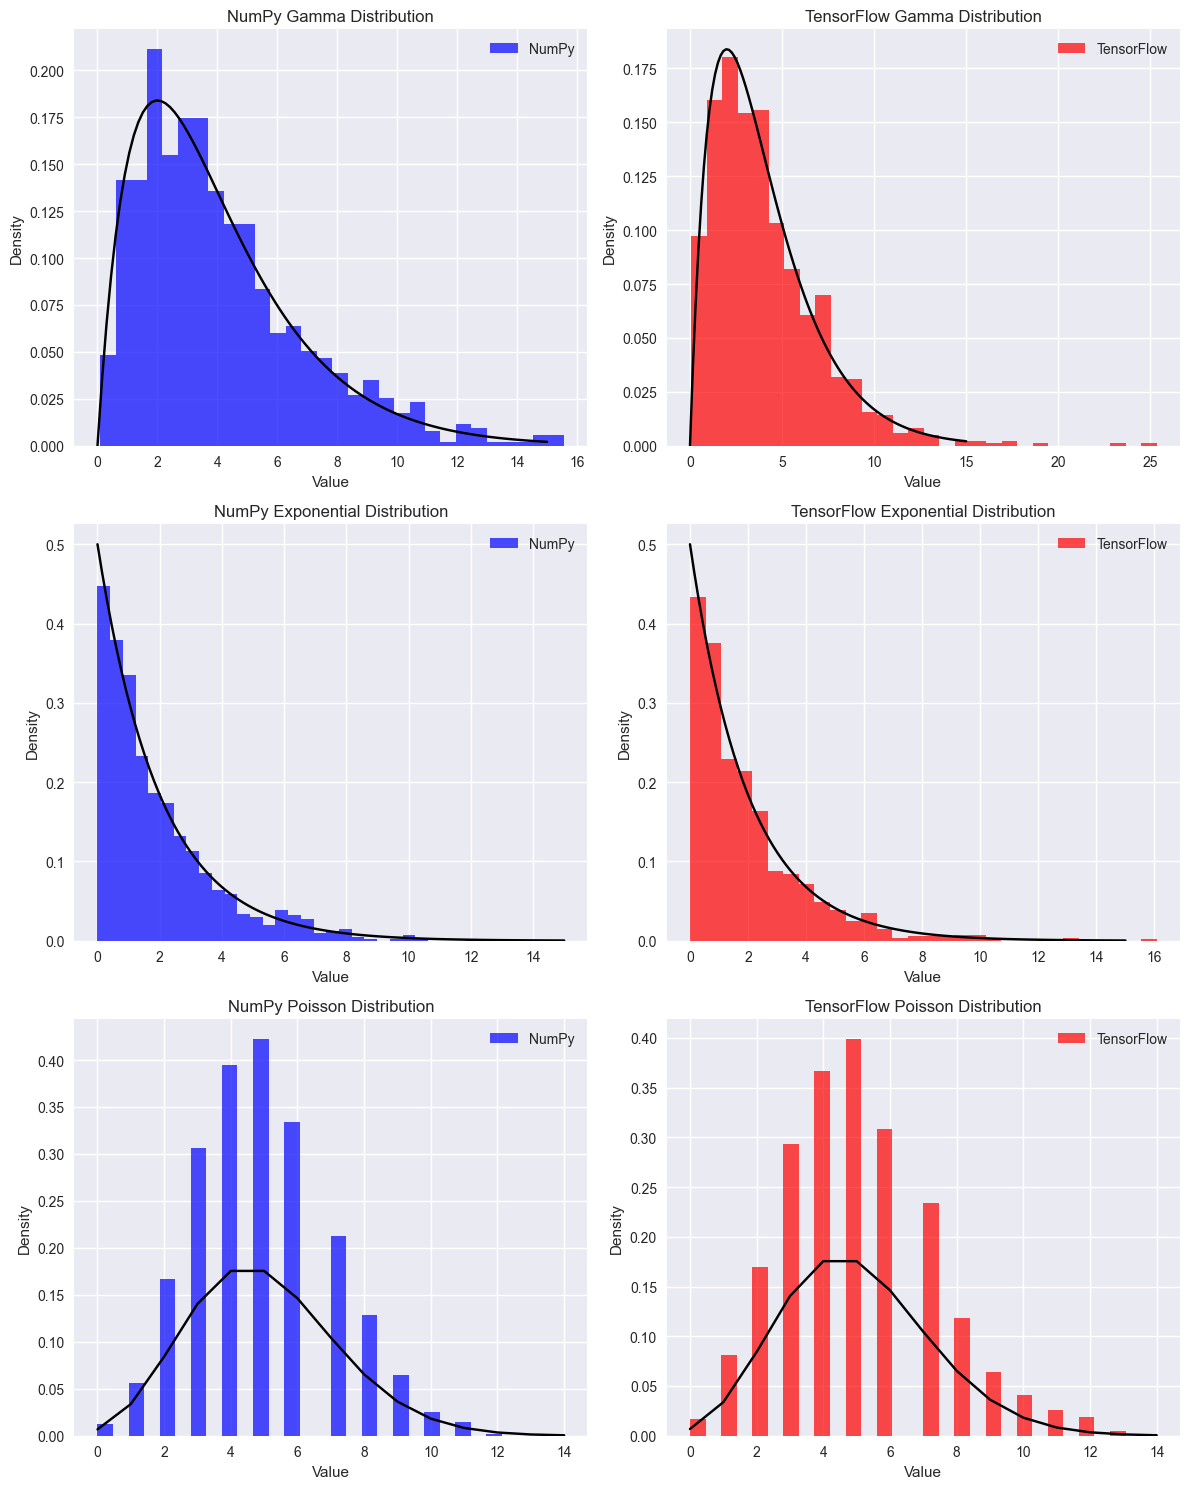

In [9]:

# Create subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 15))

# Gamma plots
ax1.hist(gamma_sample, bins=30, density=True, alpha=0.7, color='blue', label='NumPy')
ax1.set_title('NumPy Gamma Distribution')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.legend()
ax2.hist(tf_gamma_sample.numpy(), bins=30, density=True, alpha=0.7, color='red', label='TensorFlow')
ax2.set_title('TensorFlow Gamma Distribution')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend()

# Add theoretical PDFs for Gamma
x = np.linspace(0, 15, 100)
gamma_pdf = tf_gamma.prob(x).numpy()
ax1.plot(x, gamma_pdf, 'k-', label='PDF')
ax2.plot(x, gamma_pdf, 'k-', label='PDF')

# Exponential plots
ax3.hist(exp_sample, bins=30, density=True, alpha=0.7, color='blue', label='NumPy')
ax3.set_title('NumPy Exponential Distribution')
ax3.set_xlabel('Value')
ax3.set_ylabel('Density')
ax3.legend()
ax4.hist(tf_exp_sample.numpy(), bins=30, density=True, alpha=0.7, color='red', label='TensorFlow')
ax4.set_title('TensorFlow Exponential Distribution')
ax4.set_xlabel('Value')
ax4.set_ylabel('Density')
ax4.legend()

# Add theoretical PDFs for Exponential
exp_pdf = tf_exp.prob(x).numpy()
ax3.plot(x, exp_pdf, 'k-', label='PDF')
ax4.plot(x, exp_pdf, 'k-', label='PDF')

# Poisson plots
ax5.hist(poisson_sample, bins=30, density=True, alpha=0.7, color='blue', label='NumPy')
ax5.set_title('NumPy Poisson Distribution')
ax5.set_xlabel('Value')
ax5.set_ylabel('Density')
ax5.legend()
ax6.hist(tf_poisson_sample.numpy(), bins=30, density=True, alpha=0.7, color='red', label='TensorFlow')
ax6.set_title('TensorFlow Poisson Distribution')
ax6.set_xlabel('Value')
ax6.set_ylabel('Density')
ax6.legend()

# Add theoretical PMFs for Poisson
x_poisson = np.arange(0, 15)
poisson_pmf = tf_poisson.prob(x_poisson).numpy()
ax5.plot(x_poisson, poisson_pmf, 'k-', label='PMF')
ax6.plot(x_poisson, poisson_pmf, 'k-', label='PMF')
plt.tight_layout()
plt.show()


## Statistical Comparison

Let's compare the statistical properties of our samples and calculate the KL divergence between the NumPy and TensorFlow implementations.


In [28]:
# Define KL divergence calculation function
def calculate_kl_divergence(p, q, bins='auto'):
    hist_p, bin_edges_p = np.histogram(p, bins=bins, density=True)
    hist_q, bin_edges_q = np.histogram(q, bins=bins, density=True)
    # Add small constant to avoid division by zero
    hist_p = hist_p + 1e-10
    hist_q = hist_q + 1e-10

    b = np.log(hist_p[:, np.newaxis] / hist_q[np.newaxis, :]) 
    return np.sum(hist_p[:, np.newaxis] * b[np.newaxis, :])

# Print statistical comparisons
print("Gamma Distribution:")
print(f"NumPy - Mean: {np.mean(gamma_sample):.2f}, Var: {np.var(gamma_sample):.2f}")
print(f"TF - Mean: {tf.reduce_mean(tf_gamma_sample.numpy()):.2f}, Var: {tf.math.reduce_variance(tf_gamma_sample.numpy()):.2f}")
print(f"Theory- Mean: {2.0 * 2.0:.2f}, Var: {2.0 * 2.02:.2f}")

# Calculate KL divergence
kl_gamma = calculate_kl_divergence(gamma_sample, tf_gamma_sample.numpy())
print(f"KL Divergence (Gamma): {kl_gamma:.4f}")

Gamma Distribution:
NumPy - Mean: 4.12, Var: 7.86
TF - Mean: 4.08, Var: 8.85
Theory- Mean: 4.00, Var: 4.04
KL Divergence (Gamma): 346.7839
